<a href="https://colab.research.google.com/github/Davron030901/PyTorch/blob/main/18_Keras_Cats_vs_Dogs_Train_with_your_own_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Keras Cats vs Dogs - Training using your own data**

---

In this lesson, we learn how to setup data generators to load our own dataset and train a classifier using Keras.
1. Download and Explore our data
2. Create a simple CNN
3. Create our Data Generators
4. Train our model
5. Test some inferences
6. Checkpoints

In [ ]:
# import our packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.models import load_model
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## **1. Download and Explore our Data**

In [ ]:
!gdown --id 1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip
!unzip -q test1.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
From (redirected): https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk&confirm=t&uuid=66d2e609-7775-462d-816f-cb5d5a75c16d
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:18<00:00, 45.4MB/s]


In [ ]:
# Define our images sizes
IMAGE_WIDTH = 60
IMAGE_HEIGHT = 60
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

### **Loading our data and it's labels into a dataframe**

There are many ways we can do this, this way is relatively simple to follow.

`dog.1034234.jpg`

In [ ]:
filenames = os.listdir("./train")

categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'class': categories
})
df.head()

,filename,class
0,dog.8730.jpg,1
1,cat.4171.jpg,0
2,dog.3900.jpg,1
3,cat.5796.jpg,0
4,cat.12113.jpg,0


### **Check the counts in each class**

<Axes: xlabel='class'>

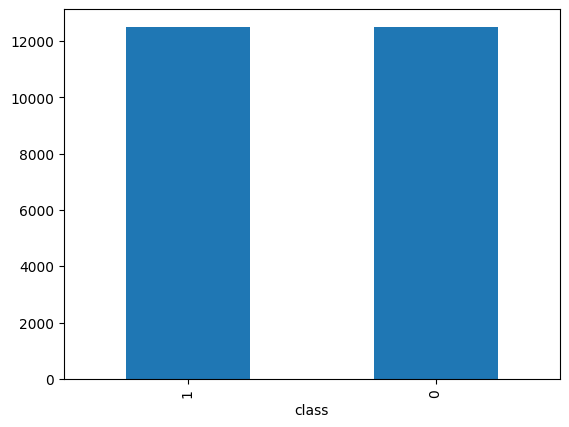

In [ ]:
df['class'].value_counts().plot.bar()

#### **View a sample image**

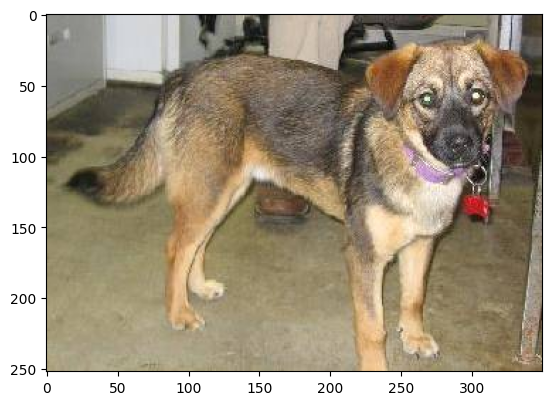

In [ ]:
sample = random.choice(filenames)
image = load_img("./train/" + sample)
plt.imshow(image)

## **2. Create our Model**

In [ ]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 58, 58, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 29, 29, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466,594 (1.78 MB)

 Trainable params: 466,594 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

## **3. Create our Data Generators**

In [ ]:
df["class"] = df["class"].replace({0: 'cat', 1: 'dog'})
df.head()

,filename,class
0,dog.8730.jpg,dog
1,cat.4171.jpg,cat
2,dog.3900.jpg,dog
3,cat.5796.jpg,cat
4,cat.12113.jpg,cat


#### **Split our dataset using train_test_split**

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=7)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [ ]:
train_df.head()

,filename,class
0,cat.3119.jpg,cat
1,dog.3827.jpg,dog
2,cat.6289.jpg,cat
3,cat.3512.jpg,cat
4,cat.1839.jpg,cat


In [ ]:
validate_df.head()

,filename,class
0,dog.3519.jpg,dog
1,dog.2972.jpg,dog
2,dog.234.jpg,dog
3,dog.2997.jpg,dog
4,cat.9586.jpg,cat


### **Create our Training Data Generator**

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "./train/",
    x_col = 'filename',
    y_col = 'class',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


### **Create our Validation Data Generator**

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "./train/",
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


#### **Creating an example Data Generator to load just a single image**

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "./train/",
    x_col='filename',
    y_col='class',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


#### **Preview that image**

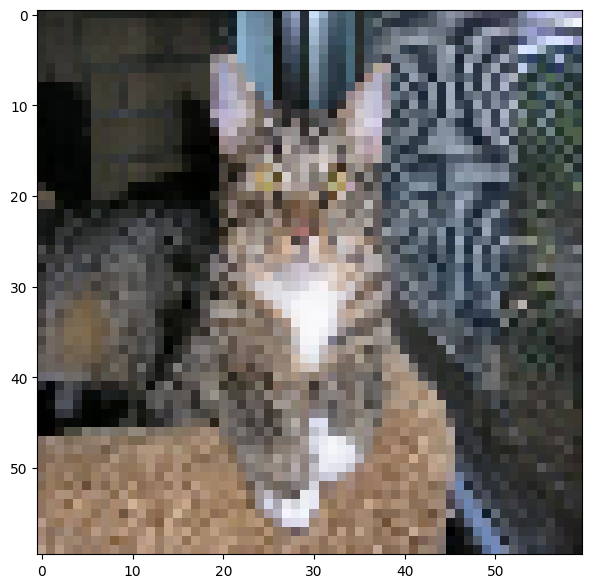

In [ ]:
plt.figure(figsize=(6, 6))

for X_batch, Y_batch in example_generator:
    image = X_batch[0]
    plt.imshow(image)
    break

plt.tight_layout()
plt.show()

## **4. Start Training Our Model**

In [ ]:
epochs = 10

history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = 5000//batch_size,
    steps_per_epoch = 20000//batch_size,
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 136ms/step - accuracy: 0.5990 - loss: 0.6578 - val_accuracy: 0.7115 - val_loss: 0.5512
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.7388 - loss: 0.5279 - val_accuracy: 0.7624 - val_loss: 0.4880
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.7866 - loss: 0.4618 - val_accuracy: 0.7949 - val_loss: 0.4485
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.8183 - loss: 0.4089 - val_accuracy: 0.7668 - val_loss: 0.5120
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 228ms/step - accuracy: 0.8330 - loss: 0.3683 - val_accuracy: 0.8181 - val_loss: 0.4016
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 135ms/step - accuracy: 0.8645 - loss: 0.3154 - val_accuracy: 0.8207 - val_loss: 0.4063
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 135ms/step - accuracy: 0.8870 - loss: 0.2680 - val_accuracy: 0.8037 - val_loss: 0.4698
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 136ms/step - accuracy: 0.9060 - loss: 0.2268 - v

In [ ]:
# Save our model
# model.save_weights("cats_vs_dogs_10_epochs.h5")
# model.load_weights("cats_vs_dogs_10_epochs.weights.h5")
model.save("cats_vs_dogs_10_epochs.h5")  # Full model save

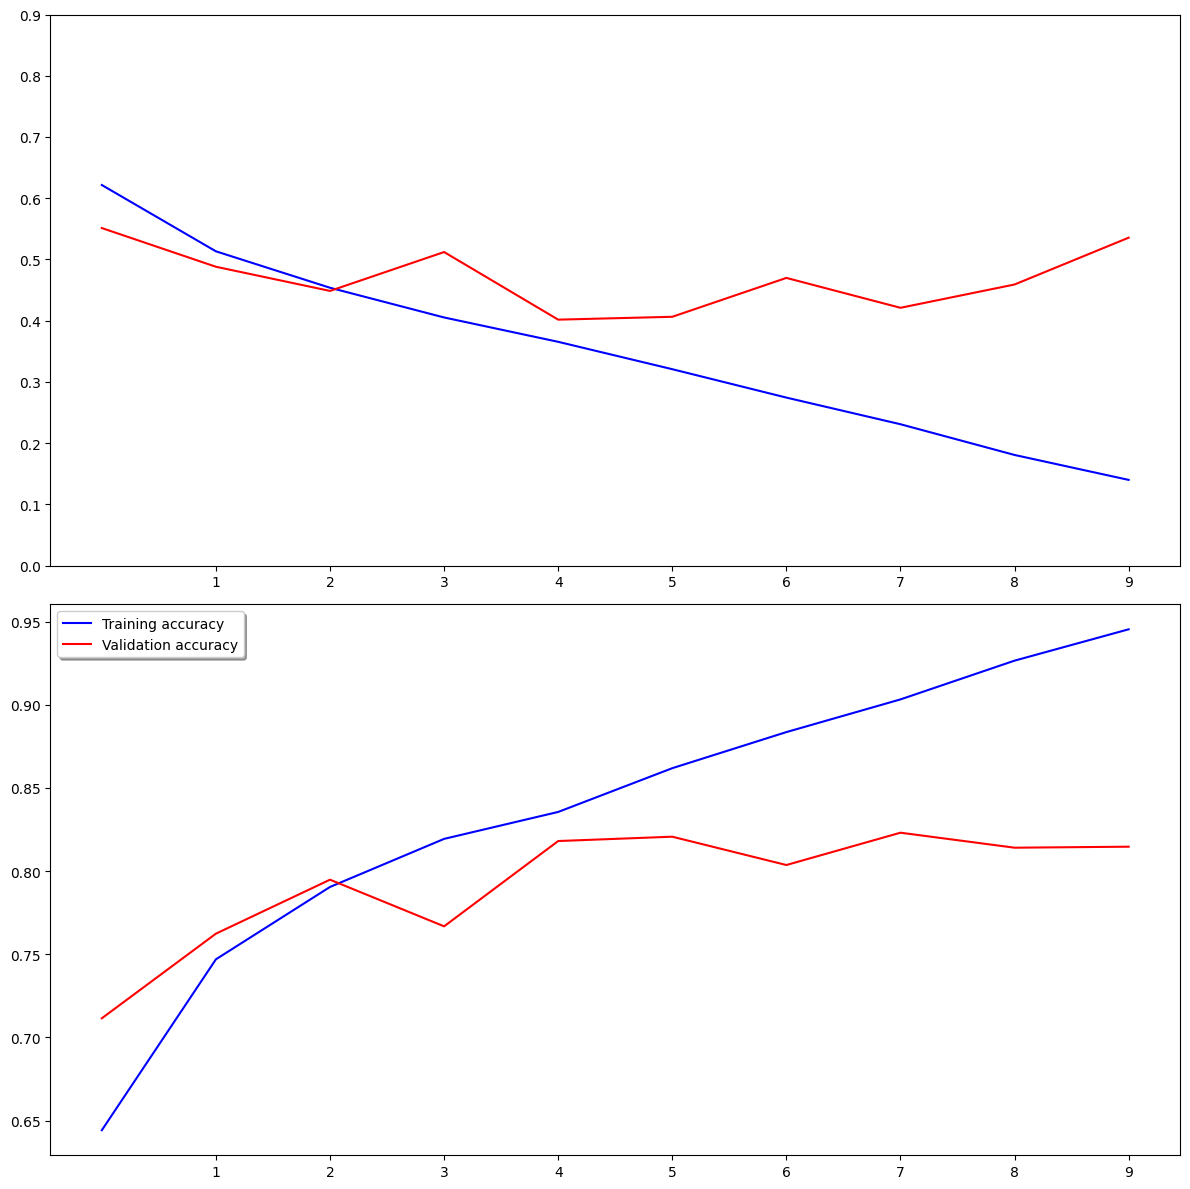

In [ ]:
# Viewour for performance plots

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

#### **Get the predictions for our validation images**

In [ ]:
# We run our prediction on all images in the validation set
predict = model.predict(validation_generator, steps = int(np.ceil(5000 / batch_size)))

157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step


#### **Add it to our dataframe for eacy viewing**

In [ ]:
validate_df['predicted'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
validate_df['predicted'] = validate_df['predicted'].replace(label_map)
validate_df

,filename,class,predicted
0,dog.3519.jpg,dog,dog
1,dog.2972.jpg,dog,cat
2,dog.234.jpg,dog,cat
3,dog.2997.jpg,dog,cat
4,cat.9586.jpg,cat,cat
...,...,...,...
4995,cat.3669.jpg,cat,cat
4996,cat.9814.jpg,cat,cat
4997,dog.10494.jpg,dog,cat
4998,cat.11613.jpg,cat,dog


## **Inference on a batch of images from our validation dataset**

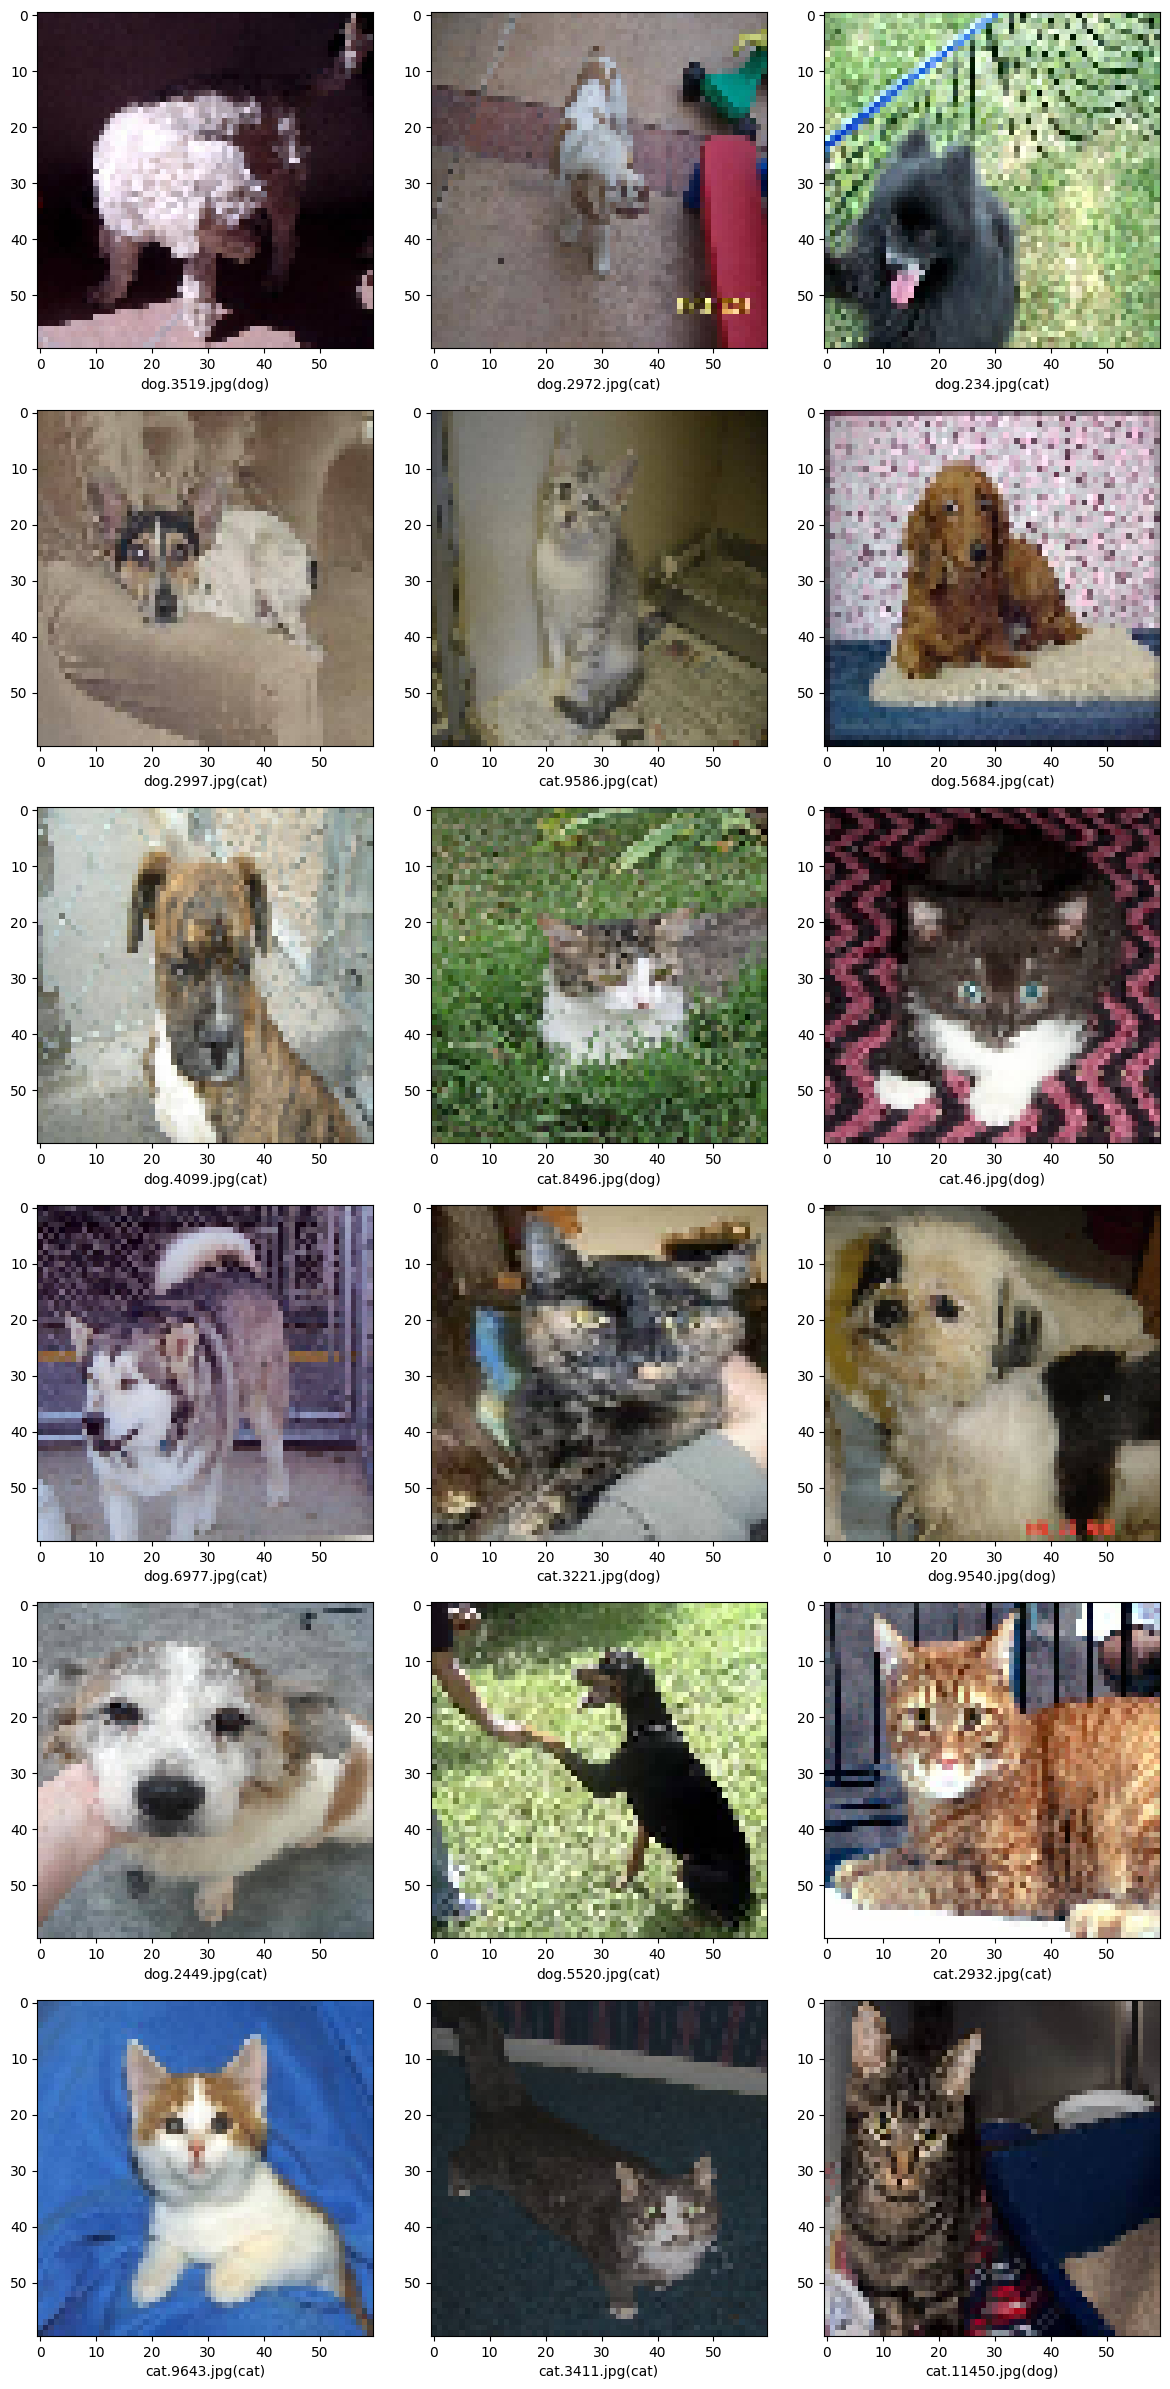

In [ ]:
sample_test = validate_df.head(18)
sample_test.head()

plt.figure(figsize=(12, 24))

for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['predicted']
    img = load_img("./train/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint("MNIST_Checkpoint.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 5, #Number of epochs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

In [ ]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

In [ ]:
# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

In [ ]:
epochs = 10

history = model.fit(
    train_generator,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = 5000//batch_size,
    steps_per_epoch = 20000//batch_size,
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9650 - loss: 0.0943
Epoch 1: val_loss improved from inf to 0.58786, saving model to MNIST_Checkpoint.h5


625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.9650 - loss: 0.0943 - val_accuracy: 0.8135 - val_loss: 0.5879 - learning_rate: 5.0000e-04
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.9735 - loss: 0.0712
Epoch 2: val_loss did not improve from 0.58786
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 133ms/step - accuracy: 0.9735 - loss: 0.0712 - val_accuracy: 0.8071 - val_loss: 0.6765 - learning_rate: 5.0000e-04
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9776 - loss: 0.0630
Epoch 3: val_loss did not improve from 0.58786
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 132ms/step - accuracy: 0.9776 - loss: 0.0630 - val_accuracy: 0.8047 - val_loss: 0.7577 - learning_rate: 5.0000e-04
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9813 - loss: 0.0512
Epoch 4: val_loss did not improve from 0.58786

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 132ms/step - accuracy: 0.9813 - loss: 

In [ ]:
# Define a monitoring directory where new images will be placed
MONITOR_DIR = "./monitor_images/"
PROCESSED_DIR = "./processed_images/"

# Create directories if they don't exist
os.makedirs(MONITOR_DIR, exist_ok=True)
os.makedirs(PROCESSED_DIR, exist_ok=True)

# Load our saved model
model = load_model("cats_vs_dogs_10_epochs.h5")

# Map the prediction indices to class names
label_map = {0: 'cat', 1: 'dog'}

print("Starting continuous monitoring for new images...")
print(f"Place new images in the {MONITOR_DIR} folder to get predictions")

# Continuous monitoring loop
while True:
    # Get all files in the monitoring directory
    files = os.listdir(MONITOR_DIR)
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if image_files:
        print(f"Found {len(image_files)} new image(s) to process...")

        for img_file in image_files:
            try:
                # Load and preprocess the image
                img_path = os.path.join(MONITOR_DIR, img_file)
                img = load_img(img_path, target_size=IMAGE_SIZE)
                img_array = img_to_array(img)
                img_array = img_array / 255.0  # Rescale just like our training data
                img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

                # Make prediction
                prediction = model.predict(img_array)
                predicted_class_idx = np.argmax(prediction, axis=-1)[0]
                predicted_class = label_map[predicted_class_idx]
                confidence = prediction[0][predicted_class_idx] * 100

                print(f"Image: {img_file}, Prediction: {predicted_class}, Confidence: {confidence:.2f}%")

                # Move the processed file to prevent reprocessing
                os.rename(img_path, os.path.join(PROCESSED_DIR, img_file))

            except Exception as e:
                print(f"Error processing {img_file}: {str(e)}")

    # Sleep for a while before checking again
    time.sleep(5)  # Check every 5 seconds

# Note: This is an infinite loop (while True) with actual functionality.
# To stop the script, you would need to interrupt it (Ctrl+C).

Starting continuous monitoring for new images...
Place new images in the ./monitor_images/ folder to get predictions


### **Another useful callback is Reducing our learning Rate on Plateau**

We can avoid having our oscillate around the global minimum by attempting to reduce the Learn Rate by a certain fact. If no improvement is seen in our monitored metric (val_loss typically), we wait a certain number of epochs (patience) then this callback reduces the learning rate by a factor